# BECOMING A DATA SCIENTIST

In [201]:
import mysql.connector
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick

In [202]:
config = configparser.ConfigParser()
config.read('My_SQL.ini')
try:
    mydb = mysql.connector.connect(
        host = config.get("My_SQL", "host"),
        port = config.get("My_SQL", "port"),
        user = config.get("My_SQL", "user"),
        password = config.get("My_SQL", "password"),
        database = config.get("My_SQL", "database"))
    cur = mydb.cursor(buffered=True)
    print("connected")
except:
    print("unable to connect")

connected


### Education-Level

In [122]:
df_education = pd.read_sql_query("""SELECT e.education_level, COUNT(k.respondent_id)as Number_of_Respondents 
                              FROM education_level e, kaggle_respondents_info k
                              WHERE e.education_level_id = k.education_level_id
                              GROUP BY e.education_level ORDER BY Number_of_Respondents""", mydb)
df_education.set_index('education_level', inplace=True)
df_education

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4876\1206261027.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_education = pd.read_sql_query("""SELECT e.education_level, COUNT(k.respondent_id)as Number_of_Respondents


,Number_of_Respondents
education_level,
No formal education past high school,564
Professional doctorate,585
I prefer not to answer,1394
Some college/university study without earning a bachelor’s degree,1431
Doctoral degree,2657
Bachelor’s degree,7625
Master’s degree,9142


In [123]:
#add a percentage column
percentages = []
total_responses = df_education['Number_of_Respondents'].sum()
for i in range(df_education.shape[0]):
    pct = (df_education['Number_of_Respondents'][i] / total_responses) * 100
    percentages.append(round(pct, 2))
df_education['percentages'] = percentages
del df_education["Number_of_Respondents"]
df_education

,percentages
education_level,
No formal education past high school,2.41
Professional doctorate,2.50
I prefer not to answer,5.96
Some college/university study without earning a bachelor’s degree,6.12
Doctoral degree,11.36
Bachelor’s degree,32.59
Master’s degree,39.07


In [124]:
#function for creating a barchart
def my_barchart(my_data, my_kind, my_title, my_spines, 
                my_xlabel, my_ylabel, my_xticks, my_yticks, my_stacked):
    ax = my_data.plot(kind=my_kind, figsize= (7,3), stacked=my_stacked, color= "limegreen")
    ax.bar_label(ax.containers[0])
    ax.spines['top'].set_visible(my_spines)
    ax.spines['right'].set_visible(my_spines)
    ax.spines['bottom'].set_visible(my_spines)
    ax.spines['left'].set_visible(my_spines)
    plt.title(f'{my_title}')
    plt.xlabel(f'{my_xlabel}')
    plt.ylabel(f'{my_ylabel}')
    plt.xticks(color = my_xticks)
    plt.yticks(color = my_yticks)
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100.0))
    ax.get_legend().set_visible(False)
    plt.show()

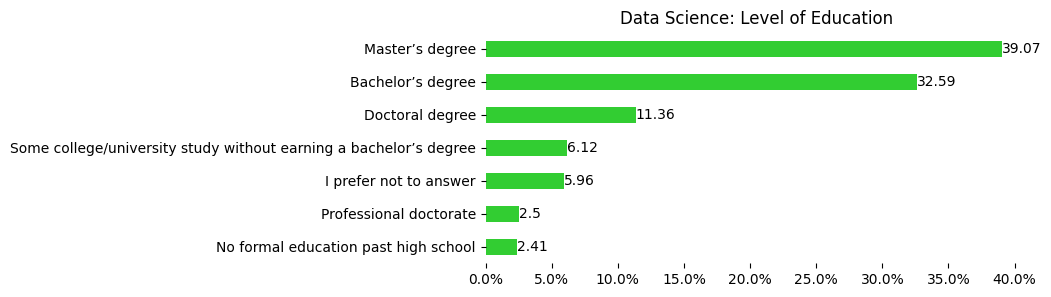

In [125]:
my_barchart(df_education, 'barh', 'Data Science: Level of Education', False, '', '', '0', '0', False)

### Learning Platforms

In [138]:
df_platform = pd.read_sql_query("""SELECT p.platform, COUNT(k.respondent_id)as Number_of_Respondents 
                              FROM learning_platforms p, kaggle_respondents_info k
                              WHERE p.platform_id = k.education_level_id
                              GROUP BY p.platform ORDER BY Number_of_Respondents DESC""", mydb)
df_platform

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4876\3132502702.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_platform = pd.read_sql_query("""SELECT p.platform, COUNT(k.respondent_id)as Number_of_Respondents


,platform,Number_of_Respondents
0,DataCamp,9142
1,Coursera,7625
2,edX,2657
3,Udemy,1431
4,Kaggle Learn Courses,1394
5,Udacity,585
6,Fast.ai,564


In [139]:
#add a percentage column
percentages = []
total_responses = df_platform['Number_of_Respondents'].sum()
for i in range(df_platform.shape[0]):
    pct = (df_platform['Number_of_Respondents'][i] / total_responses) * 100
    percentages.append(round(pct, 2))
df_platform['percentages'] = percentages
df_platform

,platform,Number_of_Respondents,percentages
0,DataCamp,9142,39.07
1,Coursera,7625,32.59
2,edX,2657,11.36
3,Udemy,1431,6.12
4,Kaggle Learn Courses,1394,5.96
5,Udacity,585,2.50
6,Fast.ai,564,2.41


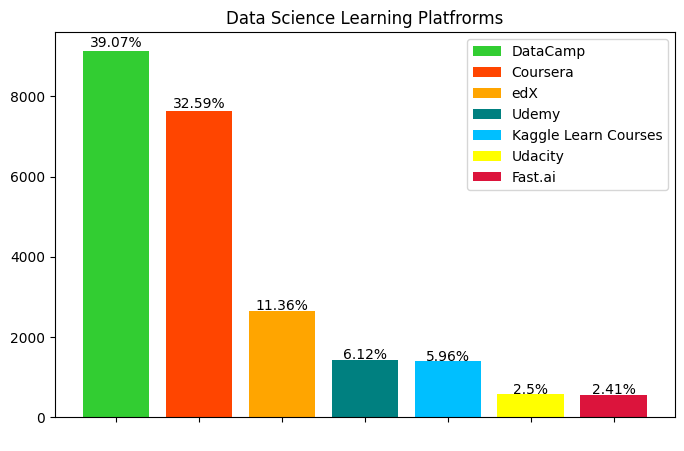

In [208]:
#function
def my_bar(my_xdata, my_ydata, my_label, my_pct, my_title, bbox):
    plt.figure(figsize=(8,5))
    colors_list = ["limegreen", "orangered", "orange", "teal", "deepskyblue", "yellow", "crimson"]
    graph = plt.bar(my_xdata, my_ydata, color = colors_list, 
                    label = my_label)
    plt.title(my_title)
    plt.xticks(color = 'w')


    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height*1.01,
                 str(my_pct[i])+'%', ha='center')
        i+=1

    plt.legend(bbox_to_anchor=(bbox,1), loc='upper right')
    plt.show()

#Creating my chart
my_bar(df_platform['platform'], df_platform['Number_of_Respondents'], df_platform['platform'], 
       df_platform['percentages'], 'Data Science Learning Platfrorms', 1.0)

### Helpful Platforms

In [183]:
df_hp = pd.read_sql_query("""SELECT p.platfm, COUNT(k.respondent_id)as Number_of_Respondents 
                              FROM helpful_platforms p, kaggle_respondents_info k
                              WHERE p.platfm_id = k.education_level_id
                              GROUP BY p.platfm ORDER BY Number_of_Respondents DESC""", mydb)
df_hp

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4876\2334915819.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_hp = pd.read_sql_query("""SELECT p.platfm, COUNT(k.respondent_id)as Number_of_Respondents


,platfm,Number_of_Respondents
0,"Video platforms (YouTube, Twitch, etc)",9142
1,None,7625
2,"Online courses (Coursera, EdX, etc)",2657
3,Other,1431
4,"Social media platforms (Reddit, Twitter, etc)",1394
5,None / I do not study data science,585
6,"Kaggle (notebooks, competitions, etc)",564


In [184]:
#Deleting the rows that shows "None" - not helpful to the analysis
df_hp = df_hp.drop(index=[1, 5])
df_hp.reset_index(inplace=True)

In [185]:
#add a percentage column
percentages = []
total_responses = df_hp['Number_of_Respondents'].sum()
for i in range(df_hp.shape[0]):
    pct = (df_hp['Number_of_Respondents'][i] / total_responses) * 100
    percentages.append(round(pct, 2))
df_hp['percentages'] = percentages
df_hp

,index,platfm,Number_of_Respondents,percentages
0,0,"Video platforms (YouTube, Twitch, etc)",9142,60.19
1,2,"Online courses (Coursera, EdX, etc)",2657,17.49
2,3,Other,1431,9.42
3,4,"Social media platforms (Reddit, Twitter, etc)",1394,9.18
4,6,"Kaggle (notebooks, competitions, etc)",564,3.71


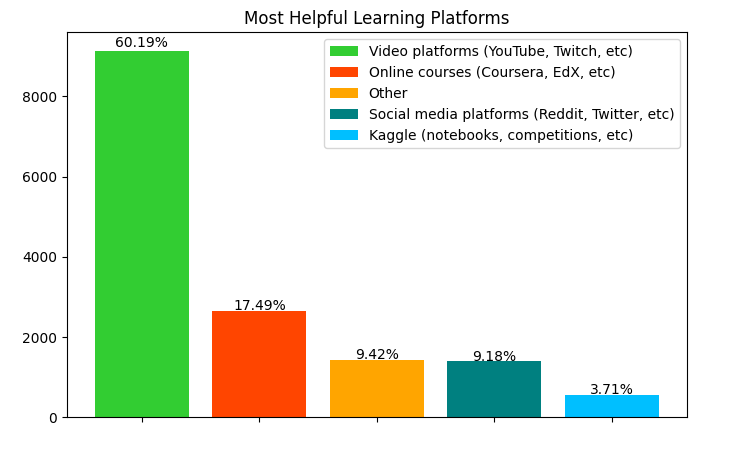

In [209]:
my_bar(df_hp['platfm'], df_hp['Number_of_Respondents'], df_hp['platfm'], 
       df_hp['percentages'], 'Most Helpful Learning Platforms', 1.0)

### Media Sources

In [196]:
df_media = pd.read_sql_query("""SELECT m.media, COUNT(k.respondent_id)as Number_of_Respondents 
                              FROM media_sources m, kaggle_respondents_info k
                              WHERE m.media_id = k.education_level_id
                              GROUP BY m.media ORDER BY Number_of_Respondents""", mydb)
df_media.set_index('media', inplace=True)
df_media

C:\Users\King Solo\AppData\Local\Temp\ipykernel_4876\2618082546.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_media = pd.read_sql_query("""SELECT m.media, COUNT(k.respondent_id)as Number_of_Respondents


,Number_of_Respondents
media,
"Course Forums (forums.fast.ai, Coursera forums, etc)",564
"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)",585
"Reddit (r/machinelearning, etc)",1394
"Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)",1431
"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",2657
Twitter (data science influencers),7625
"Kaggle (notebooks, forums, etc)",9142


In [197]:
#add a percentage column
percentages = []
total_responses = df_media['Number_of_Respondents'].sum()
for i in range(df_media.shape[0]):
    pct = (df_media['Number_of_Respondents'][i] / total_responses) * 100
    percentages.append(round(pct, 2))
df_media['percentages'] = percentages
del df_media['Number_of_Respondents']
df_media

,percentages
media,
"Course Forums (forums.fast.ai, Coursera forums, etc)",2.41
"YouTube (Kaggle YouTube, Cloud AI Adventures, etc)",2.50
"Reddit (r/machinelearning, etc)",5.96
"Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)",6.12
"Email newsletters (Data Elixir, O'Reilly Data & AI, etc)",11.36
Twitter (data science influencers),32.59
"Kaggle (notebooks, forums, etc)",39.07


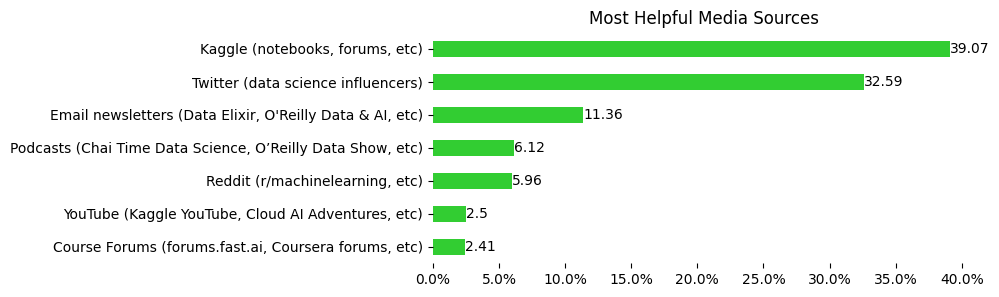

In [199]:
my_barchart(df_media, 'barh', 'Most Helpful Media Sources', False, '', '', '0', '0', False)

In [210]:
mydb.close()
cur.close()

True